In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist["data"].astype('float32') / 255.0  # Normalize pixel values to [0,1]
y = mnist["target"].astype('int')

# Display dataset information
print(f"\nDataset loaded:")
print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")
print(f"Unique labels: {np.unique(y)}")

Loading MNIST dataset...

Dataset loaded:
Features shape: (70000, 784)
Labels shape: (70000,)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


Training data shape: (56000, 784)
Training labels shape: (56000, 10)
Test data shape: (14000, 784)
Test labels shape: (14000, 10)


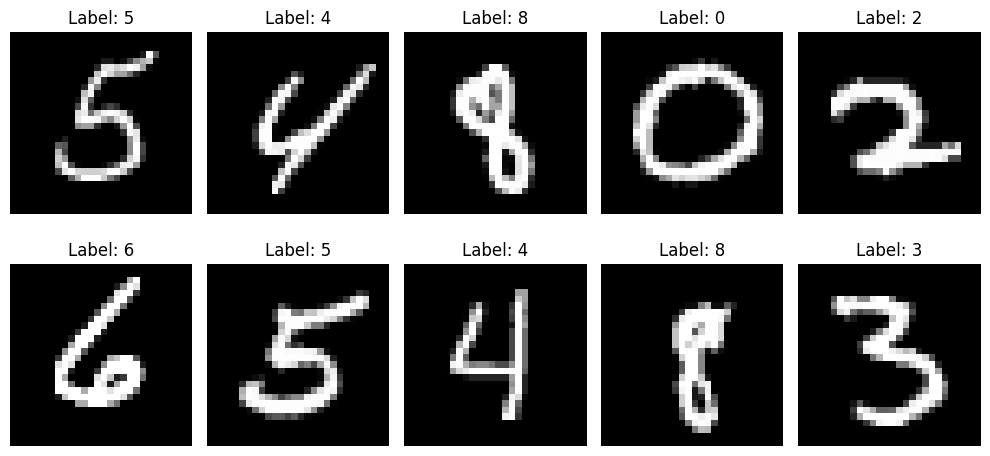

In [3]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Display sample information
print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")

# Visualize some samples
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train.iloc[i].values.reshape(28,28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()

Now, let's define and train a simple neural network model using Keras.

In [5]:
# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Let's train the model.

In [6]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7860 - loss: 0.7285 - val_accuracy: 0.9443 - val_loss: 0.2025
Epoch 2/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9344 - loss: 0.2260 - val_accuracy: 0.9593 - val_loss: 0.1489
Epoch 3/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9521 - loss: 0.1629 - val_accuracy: 0.9629 - val_loss: 0.1229
Epoch 4/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9614 - loss: 0.1313 - val_accuracy: 0.9712 - val_loss: 0.1032
Epoch 5/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9681 - loss: 0.1124 - val_accuracy: 0.9711 - val_loss: 0.0956
Epoch 6/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9737 - loss: 0.0925 - val_accuracy: 0.9746 - val_loss: 0.0856
Epoch 7/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9755 - loss: 0.0840 - val_accuracy: 0.9746 - val_loss: 0.0821
Epoch 8/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9787 - loss: 0.0740 - val_accuracy: 

Now we can evaluate the model on the test data.

In [7]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.0868
Test Accuracy: 0.9731


Let's visualize the training history.

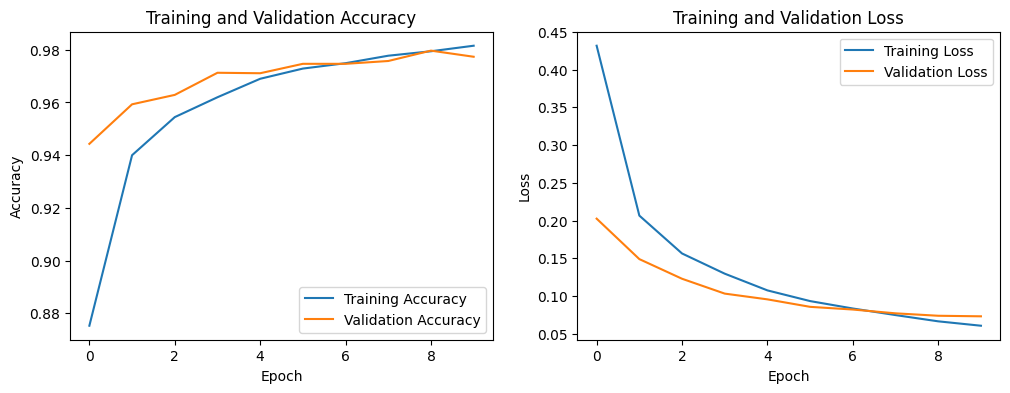

In [8]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()